In [1]:
import sys
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

# Add the path to the custom library to the system path
sys.path.append(str(Path().resolve().parent.parent))

# Import modules from the custom library
from src import Tensor, ModuleOutput
from src.core.utils import context_manager
from src.architectures.auto_encoder import VAE
from src.architectures.sequential import Sequential

### Constants


In [2]:
# Define the path to the model checkpoint
model_path = Path().resolve() / 'checkpoints' / 'variational_autoencoder'

### Load the model


In [3]:
# Load the trained model
vae: Sequential = Sequential.load(str(model_path))

# Set the model to evaluation mode
vae.eval()

In [4]:
# Access the VAE core module
vae_core: VAE = vae.modules[0]

# Read latent dimension directly from the loaded model
latent_dim = vae_core.encoder.latent_dim

# Print the latent dimension
print('Latent dim:', latent_dim)

Latent dim: 32


### Generation


In [5]:
# Define the number of images to generate
n_images = 50

# Sample latent vectors from the prior z ~ N(0, I)
z = Tensor(np.random.randn(n_images, latent_dim), dtype=np.float32)

# Set the context manager to no_grad to disable gradient tracking during inference
with context_manager.no_grad():
    # Generate images using the decoder
    generated: ModuleOutput = vae_core.decoder(x=z)

# Extract the generated images from the ModuleOutput
generated_images: Tensor = generated.output

### Display generated images


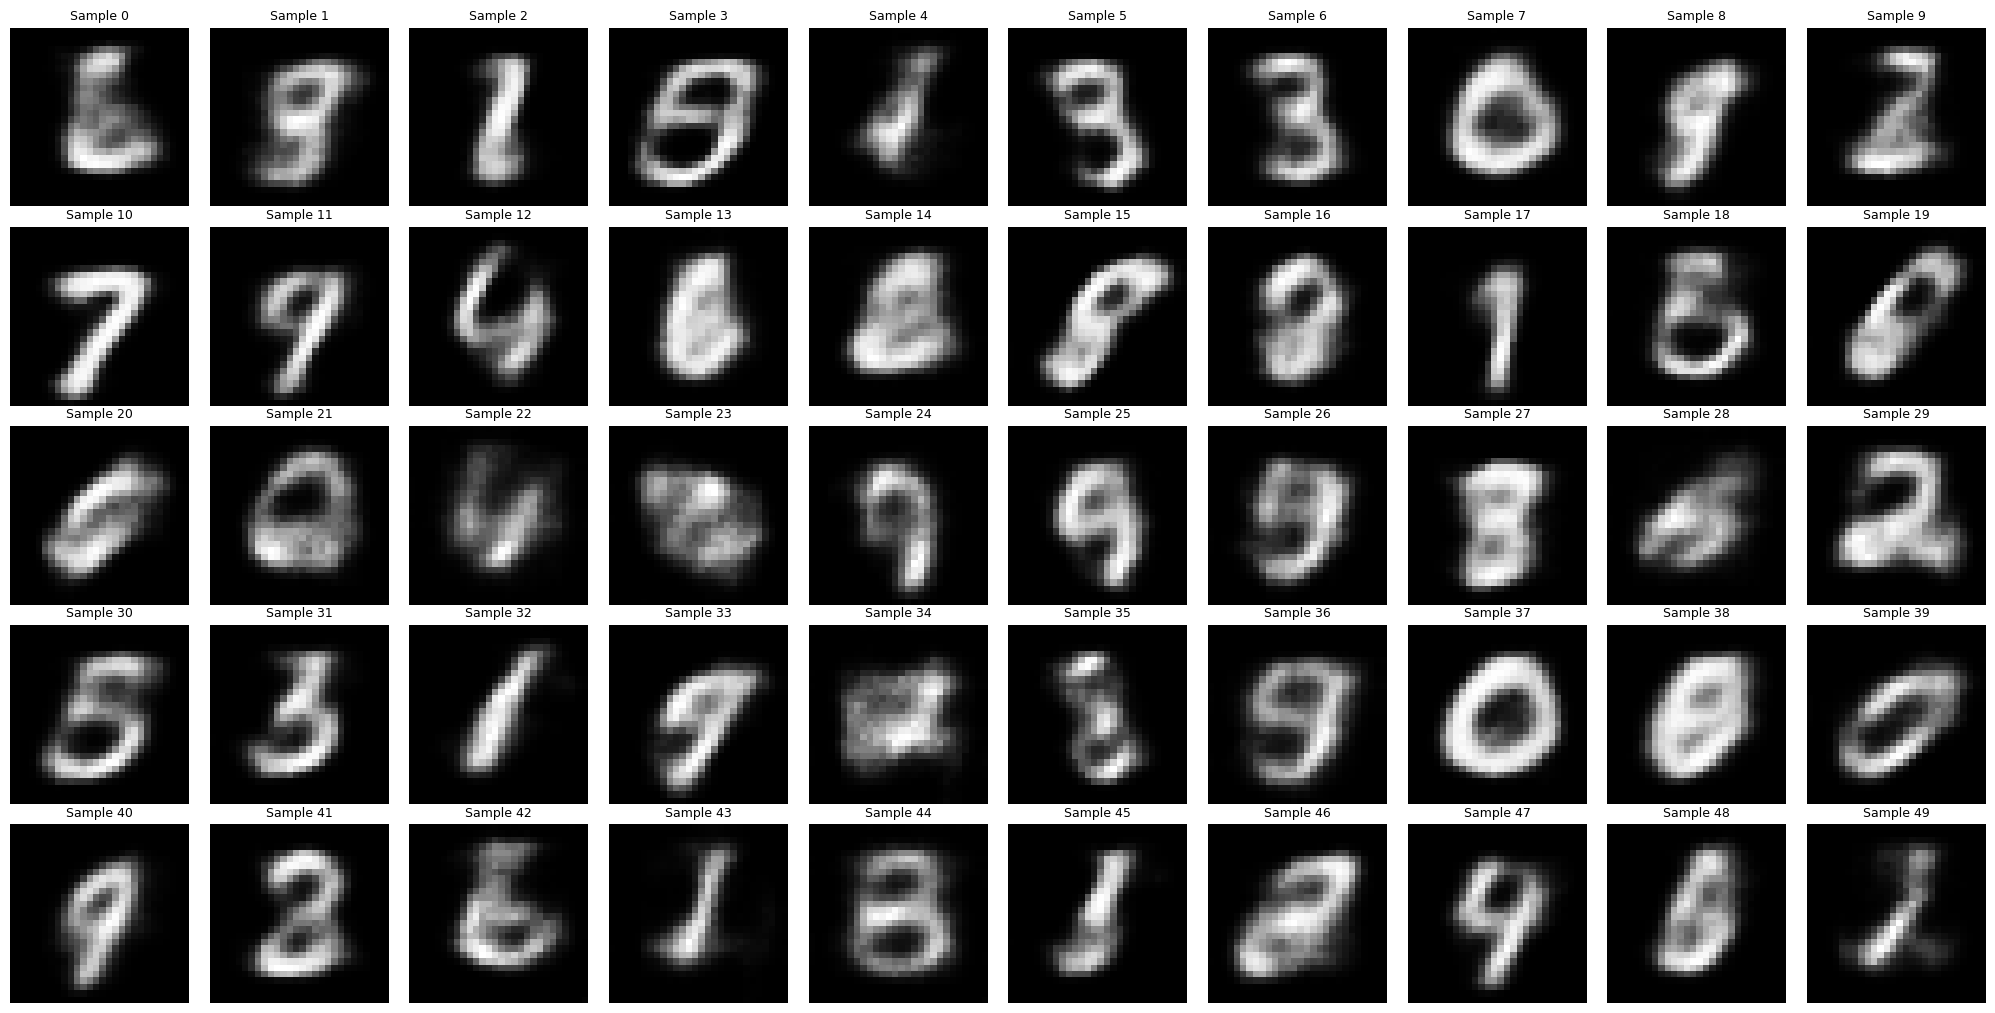

In [ ]:
# Plot generated images
n_cols = 10
n_rows = int(np.ceil(n_images / n_cols))

# Create a figure with subplots for each generated image
fig, axes = plt.subplots(n_rows, n_cols, figsize=(2 * n_cols, 2 * n_rows))
axes = np.array(axes).reshape(n_rows, n_cols)

# Convert generated images to numpy for plotting
images_np = generated_images.to_numpy()

# Plot each generated image in the corresponding subplot
for idx in range(n_rows * n_cols):
    ax = axes[idx // n_cols, idx % n_cols]
    ax.axis('off')
    if idx < n_images:
        ax.imshow(images_np[idx], cmap='gray')
        ax.set_title(f'Sample {idx}', fontsize=9)

# Adjust layout and display the plot
plt.tight_layout(pad=0.25)
plt.show()